_These notes were taken as I followed along the group session on Privacy in UiO course IN-STK5000 H20_

In [2]:
import numpy
import matplotlib.pyplot as plt

# Randomization

In [3]:
true_values = numpy.random.choice([0,1], 10000)

In [4]:
true_values[:10]

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 1])

In [5]:
true_values.mean()

0.503

In [6]:
def randomized_response(a, theta=0.5):
    '''Randomized mechanism tell truth w/ prob theta'''
    coins = numpy.random.choice([True, False], len(a), p=(theta, 1-theta))
    # coins used as a mask (index). 
    response = a.copy()
    noise = numpy.random.choice([0,1], len(a))
    
    # keep response if coins[i] = true
    # else replace with noise value
    response[~coins] = noise[~coins]  # substitutes False values in 
    
    return response

In [7]:
r = numpy.random.choice([True, False], 10)

l = numpy.linspace(0, 9, 10)

In [17]:
numpy.random.choice([0,1])

1

In [8]:
r

array([False,  True, False,  True, False, False,  True,  True, False,
       False])

In [9]:
l

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [10]:
l[~r]

array([0., 2., 4., 5., 8., 9.])

In [16]:
l

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [18]:
randomized_response(true_values).mean()

0.5046

In [21]:
randomized_response(true_values, 0.1).mean()

0.5053

In [22]:
true_values_unfair = numpy.random.choice([0,1], 10000, p=(.3, .7))   # prob. of getting the first =.2, second=.8

In [23]:
true_values_unfair.mean()

0.6941

In [24]:
randomized_response(true_values_unfair).mean()

0.5989

In [26]:
p = 0.7 # 1s in the unfair data
theta = 0.5
theta * p + (1-theta)*0.5  # this looks like the utility 

0.6

In [36]:
randomized_response(true_values_unfair, 0.7).mean()

0.635

In [33]:
p = 0.8 #1s in the unfair data
theta = 0.7
theta * p + (1-theta)*0.5  # this looks like the utility 

0.71

In [34]:
def approx_p(sample, theta=0.5):
    return (randomized_response(sample, theta).mean() - (1-theta)*0.5)/theta

In [45]:
approx_p(true_values_unfair, 0.6)

0.7968333333333334

In [46]:
approx_p(true_values_unfair, 0.7)

0.800142857142857

In [47]:
def gen_sample(p, n=10000):
    return numpy.random.choice([0,1], 10000, p=(1-p, p))

In [48]:
def show_hist(p, theta):
    approx = [approx_p(gen_sample(p), theta) for _ in range(1000)]
    true_v = [gen_sample(p).mean() for _ in range(1000)]
    plt.hist(approx, bins=15, alpha=0.5, label='noisy')
    plt.hist(true_v, bins=15, alpha=0.5, label='true')
    plt.legend()

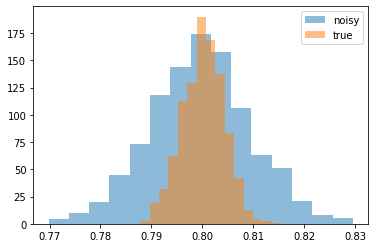

In [49]:
show_hist(0.8, 0.5)

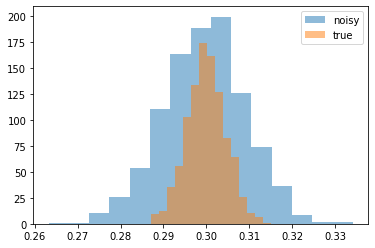

In [50]:
show_hist(0.3, 0.5)

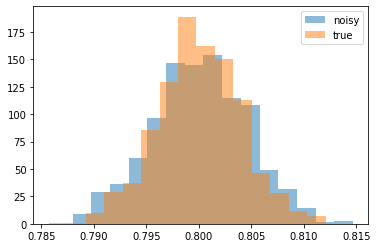

In [51]:
show_hist(0.8, 0.9)

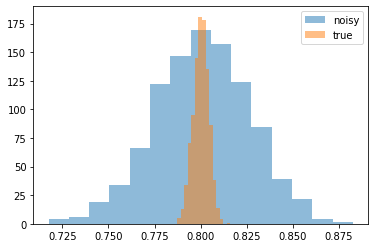

In [52]:
show_hist(0.8, 0.2)

# Differential privacy

Reminder:

$$
\Big| log \frac{\pi(a,x)}{\pi(a, x')} \Big| \leq \epsilon
$$

In [53]:
N = 10 
x = numpy.zeros(N)
xp = x.copy()
xp[-1] = 1
a = x.copy()

In [54]:
numpy.fromiter(((randomized_response(x) == a).all() for _ in range(5000)), bool).mean()

0.0558

In [55]:
numpy.fromiter(((randomized_response(xp) == a).all() for _ in range(5000)), bool).mean()

0.0194

In [56]:
thetas = numpy.linspace(0.1, 0.5, 10)

In [57]:
thetas

array([0.1       , 0.14444444, 0.18888889, 0.23333333, 0.27777778,
       0.32222222, 0.36666667, 0.41111111, 0.45555556, 0.5       ])

In [58]:
ratios = [
    numpy.fromiter(((randomized_response(x, theta) == a).all() for _ in range(5000)), bool).mean() /
    numpy.fromiter(((randomized_response(xp, theta) == a).all() for _ in range(5000)), bool).mean()
    for theta in thetas
]

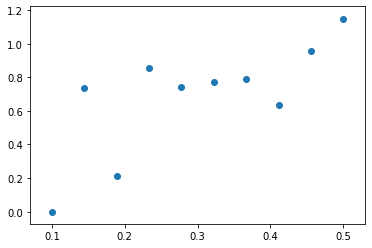

In [59]:
plt.scatter(thetas, numpy.log(ratios))

# Exponential mechanism
Example: Most popular pet

In [60]:
numpy.random.seed(42)

In [62]:
universe = ['cat', 'dog', 'hamster', 'fish']
probs = numpy.random.uniform(size=len(universe))
probs /=probs.sum()
values = numpy.random.choice(universe, size=100, p=probs)

In [63]:
values

array(['dog', 'dog', 'cat', 'fish', 'hamster', 'hamster', 'cat', 'fish',
       'fish', 'dog', 'dog', 'dog', 'dog', 'hamster', 'dog', 'dog',
       'hamster', 'cat', 'dog', 'dog', 'dog', 'fish', 'dog', 'hamster',
       'hamster', 'cat', 'hamster', 'dog', 'cat', 'fish', 'fish', 'fish',
       'dog', 'cat', 'hamster', 'dog', 'cat', 'dog', 'cat', 'fish', 'dog',
       'hamster', 'dog', 'hamster', 'hamster', 'dog', 'fish', 'fish',
       'fish', 'fish', 'hamster', 'fish', 'cat', 'dog', 'cat', 'dog',
       'dog', 'dog', 'fish', 'dog', 'dog', 'hamster', 'cat', 'fish',
       'cat', 'fish', 'hamster', 'dog', 'cat', 'fish', 'hamster',
       'hamster', 'hamster', 'cat', 'dog', 'cat', 'fish', 'hamster',
       'dog', 'cat', 'dog', 'dog', 'hamster', 'hamster', 'fish', 'dog',
       'cat', 'hamster', 'hamster', 'hamster', 'hamster', 'dog',
       'hamster', 'dog', 'cat', 'cat', 'cat', 'hamster', 'dog', 'hamster'],
      dtype='<U7')

In [64]:
probs

array([0.14102156, 0.35796222, 0.27560979, 0.22540643])

In [66]:
labels, counts = numpy.unique(values, return_counts=True)

<BarContainer object of 4 artists>

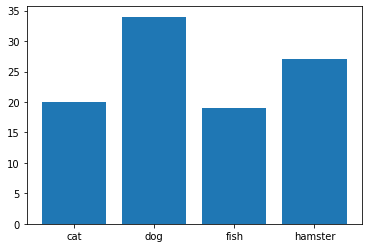

In [67]:
plt.bar(labels, counts)

In [68]:
q = counts

<BarContainer object of 4 artists>

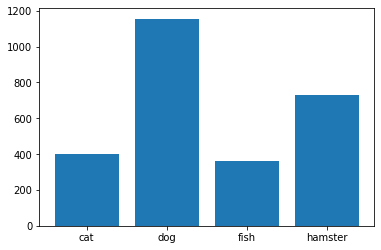

In [69]:
plt.bar(labels, counts**2)

In [70]:
epsilon = 0.5

In [72]:
pi = numpy.exp(epsilon*q)/numpy.exp(epsilon*q).sum() # softmax

<BarContainer object of 4 artists>

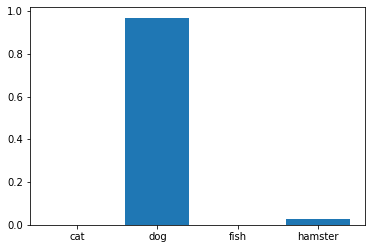

In [73]:
plt.bar(labels, pi)

<BarContainer object of 4 artists>

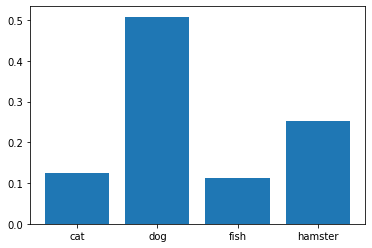

In [75]:
epsilon = 0.1
pi = numpy.exp(epsilon*q)/numpy.exp(epsilon*q).sum()
plt.bar(labels, pi)

<BarContainer object of 4 artists>

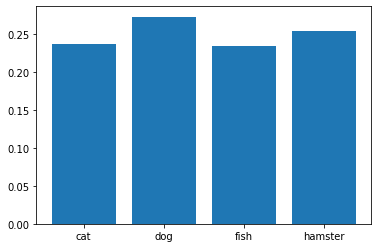

In [76]:
epsilon = 0.01
pi = numpy.exp(epsilon*q)/numpy.exp(epsilon*q).sum()
plt.bar(labels, pi)

<BarContainer object of 4 artists>

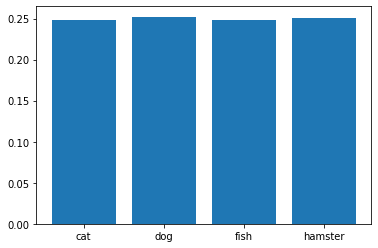

In [77]:
epsilon = 0.001
pi = numpy.exp(epsilon*q)/numpy.exp(epsilon*q).sum()
plt.bar(labels, pi)